# Systematics Summary

In [1]:
import sys
import localSettings as ls
import os
print(ls.main_path)

/Users/davidc-local/data/searchingfornues/v08_00_00_48/


In [2]:
main_path = ls.main_path
sys.path.append(main_path)

In [3]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

date and time: 10022021


In [4]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
USEBDT = True
if USEBDT:
    import xgboost as xgb
    import nue_booster 
    importlib.reload(nue_booster)
import awkward
import pandas as pd

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [6]:
# 1eNp
np_G4_v = np.array([0.54,0.94,1.18,1.59,0.72,1.16,0.71,1.24,1.97,1.62,1.97,0.69,1.82,1.94])
np_Flux_v = np.array([13.73,7.92,6.87,6.07,6.15,5.79,5.28,5.77,5.35,5.18,5.47,6.00,6.46,5.78])
np_xsec_v = np.array([19.63,15.77,15.20,13.72,14.40,15.58,18.17,15.84,17.41,22.38,16.94,19.90,17.14,16.96])
np_syst_sum = np.array([23.96,17.67,16.72,15.09,15.67,16.66,18.94,16.90,18.32,23.03,17.91,20.80,18.41,18.03])
np_syst_detsys_sum = np.array([28.14,20.55,20.09,16.65,20.25,17.55,23.68,18.34,21.26,25.63,26.37,24.00,25.74,21.07])
np_syst_detsys_mcstat_sum = np.array([107.43,26.84,22.48,18.15,21.24,19.30,25.04,20.49,23.53,27.67,29.20,28.35,30.56,28.36])

# 1e0p
zp_G4_v = np.array([1.04,0.46,1.84,0.31,0.65,3.77,0.21,1.21,0.32,0.61,0.91,0.31,0.50,1.95])
zp_Flux_v = np.array([6.79,5.83,6.40,6.39,5.56,6.12,7.48,8.17,7.93,7.08,6.00,8.11,7.44,7.65])
zp_xsec_v = np.array([23.98,18.43,20.47,23.11,22.01,36.91,26.39,25.10,22.96,26.16,25.09,32.36,24.54,24.47])
zp_syst_sum = np.array([24.94,19.34,21.53,23.98,22.71,37.61,27.43,26.42,24.29,27.11,25.81,33.36,25.65,25.71])
zp_syst_detsys_sum = np.array([27.85,21.39,39.13,65.83,26.67,41.10,40.06,43.34,40.58,42.32,30.71,38.00,31.45,31.50])
zp_syst_detsys_mcstat_sum = np.array([37.54,29.60,42.65,75.04,48.34,49.91,54.28,58.91,73.69,79.72,101.67,130.41,106.75,194.27])

# numu
mu_G4_v = np.array([1.54,1.70,1.55,1.55,1.39,1.27,1.10,1.03,1.28,1.28,1.73,1.47,1.79,0.67])
mu_Flux_v = np.array([11.80,8.46,7.37,6.39,5.85,5.72,6.01,6.09,7.23,8.27,9.40,10.33,11.43,12.11])
mu_xsec_v = np.array([19.20,17.44,16.07,15.63,15.11,14.97,15.11,15.46,15.97,15.51,15.74,15.69,15.11,15.88])
mu_syst_sum = np.array([22.59,19.46,17.75,16.96,16.26,16.07,16.29,16.65,17.58,17.62,18.41,18.85,19.04,19.98])
mu_syst_detsys_sum = np.array([25.02,23.46,20.45,18.03,16.98,17.50,17.07,19.29,18.36,20.95,20.30,26.02,23.09,26.37])
mu_syst_detsys_mcstat_sum = np.array([25.40,23.57,20.53,18.09,17.05,17.57,17.15,19.37,18.48,21.06,20.44,26.17,23.31,26.61])


#print ('len G4 : %i'%len(G4_v))
#print ('len Flux : %i'%len(Flux_v))
#print ('len xsec : %i'%len(xsec_v))
#print ('len detsys : %i'%len(syst_sum))
#print ('len detsys : %i'%len(syst_detsys_sum))
#print ('len detsys : %i'%len(syst_detsys_mcstat_sum))

# 10 Bin

In [11]:
# 1eNp
#'''
np_G4_v = np.array([0.99,1.13,1.66,0.87,1.03,1.36,1.80,1.47,1.45,1.51])
np_Flux_v = np.array([9.96,7.21,6.41,5.90,5.31,5.73,5.28,5.29,6.26,6.06])
np_xsec_v = np.array([15.68,15.51,13.76,14.97,16.77,15.65,19.99,18.57,17.71,18.90])
np_syst_sum = np.array([18.59,17.14,15.27,16.11,17.62,16.73,20.75,19.36,18.84,19.90])
np_syst_detsys_sum = np.array([21.21,20.44,16.57,17.60,20.33,19.11,22.51,26.00,21.66,22.62])
np_syst_detsys_mcstat_sum = np.array([43.09,22.28,17.53,18.31,21.21,20.36,23.75,27.64,24.54,26.12])
np_syst_constrained = np.array([38.03,14.80,10.07,10.74,13.84,13.45,16.29,21.20,18.19,19.48])
np_detstat_v = np.sqrt(np_syst_detsys_mcstat_sum**2 - np_xsec_v**2 - np_Flux_v**2)
#'''

# 1e0p
#'''
zp_G4_v = np.array([0.72,1.78,1.15,1.97,1.09,0.74,0.29,0.93,0.34,1.01])
zp_Flux_v = np.array([5.96,5.62,7.47,5.87,6.55,8.28,6.46,6.64,7.42,7.52])
zp_xsec_v = np.array([21.18,18.94,20.81,32.76,24.50,22.94,24.64,26.25,27.54,23.84])
zp_syst_sum = np.array([22.01,19.83,22.14,33.34,25.39,24.40,25.47,27.10,28.52,25.02])
zp_syst_detsys_sum = np.array([24.88,21.27,23.91,34.74,28.76,34.23,32.63,32.33,44.15,38.84])
zp_syst_detsys_mcstat_sum = np.array([32.74,26.23,33.54,45.74,42.98,45.04,56.70,75.68,79.83,138.35])
zp_syst_constrained = np.array([27.12,20.70,28.29,36.91,35.78,37.64,48.75,68.99,72.95,127.72])
zp_detstat_v = np.sqrt(zp_syst_detsys_mcstat_sum**2 - zp_xsec_v**2 - zp_Flux_v**2)
#'''

# numu
mu_G4_v = np.array([1.54,1.70,1.55,1.55,1.39,1.27,1.10,1.03,1.28,1.28,1.73,1.47,1.79,0.67])
mu_Flux_v = np.array([11.80,8.46,7.37,6.39,5.85,5.72,6.01,6.09,7.23,8.27,9.40,10.33,11.43,12.11])
mu_xsec_v = np.array([19.20,17.44,16.07,15.63,15.11,14.97,15.11,15.46,15.97,15.51,15.74,15.69,15.11,15.88])
mu_syst_sum = np.array([22.59,19.46,17.75,16.96,16.26,16.07,16.29,16.65,17.58,17.62,18.41,18.85,19.04,19.98])
mu_syst_detsys_sum = np.array([25.02,23.46,20.45,18.03,16.98,17.50,17.07,19.29,18.36,20.95,20.30,26.02,23.09,26.37])
mu_syst_detsys_mcstat_sum = np.array([25.40,23.57,20.53,18.09,17.05,17.57,17.15,19.37,18.48,21.06,20.44,26.17,23.31,26.61])
mu_detstat_v = np.sqrt(mu_syst_detsys_mcstat_sum**2 - mu_xsec_v**2 - mu_Flux_v**2)
#'''


#print ('len G4 : %i'%len(G4_v))
#print ('len Flux : %i'%len(Flux_v))
#print ('len xsec : %i'%len(xsec_v))
#print ('len detsys : %i'%len(syst_sum))
#print ('len detsys : %i'%len(syst_detsys_sum))
#print ('len detsys : %i'%len(syst_detsys_mcstat_sum))

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import matplotlib.gridspec as gridspec

In [13]:
nue_BINS = np.linspace(0.15,1.55,11)
nue_BINCENTERS = 0.5*(nue_BINS[1:]+nue_BINS[:-1])
nue_BINDIWTH = (nue_BINS[1]-nue_BINS[0])


numu_BINS = np.linspace(0.15,1.55,15)
numu_BINCENTERS = 0.5*(numu_BINS[1:]+numu_BINS[:-1])
numu_BINDIWTH = (numu_BINS[1]-numu_BINS[0])

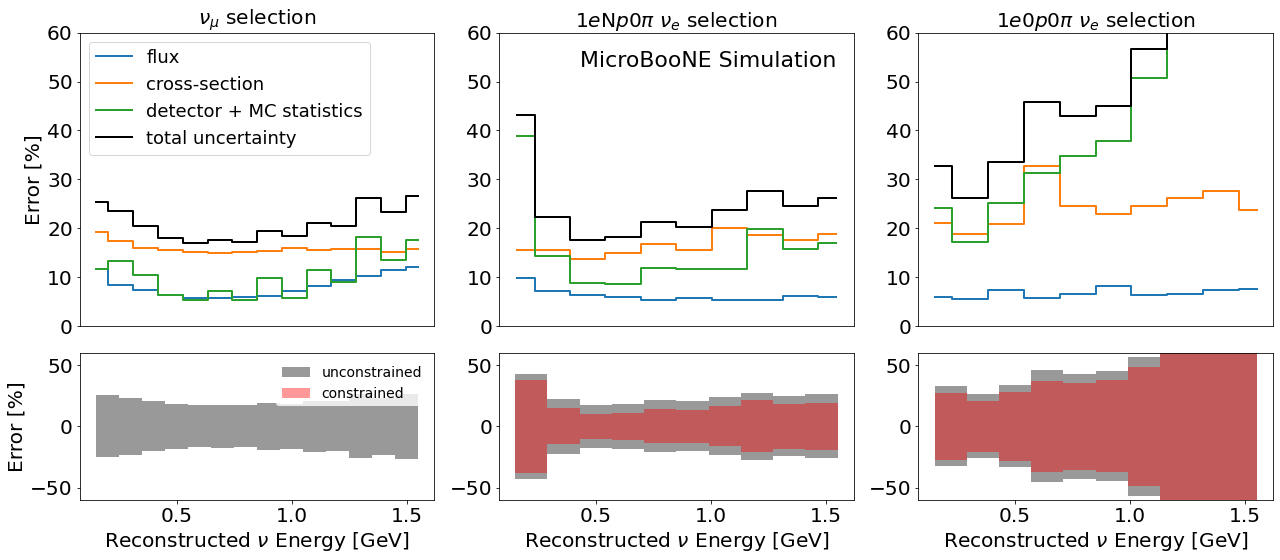

In [14]:
fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(2, 3, height_ratios=[2, 1])

mu1 = plt.subplot(gs[0])
mu2 = plt.subplot(gs[3])

np1 = plt.subplot(gs[1])
np2 = plt.subplot(gs[4])

zp1 = plt.subplot(gs[2])
zp2 = plt.subplot(gs[5])

gs.update(wspace=0.02, hspace=0.02)


#np1.step(nue_BINCENTERS,np_G4_v,where='mid',label='reinteraction syst. err.',lw=2)
mu1.step(numu_BINCENTERS,mu_Flux_v,where='mid',label='flux',lw=2)
mu1.step(numu_BINCENTERS,mu_xsec_v,where='mid',label='cross-section',lw=2)
mu1.step(numu_BINCENTERS,mu_detstat_v,where='mid',label='detector + MC statistics',lw=2)
#np1.step(nue_BINCENTERS,np_syst_sum,where='mid',label='G4 + Flux + xsec',lw=2)
#np1.step(nue_BINCENTERS,np_syst_detsys_sum,where='mid',label='+ detector systematics',lw=2)
mu1.step(numu_BINCENTERS,mu_syst_detsys_mcstat_sum,where='mid',label='total uncertainty',lw=2,color='k',linestyle='-')
#mu1.step(numu_BINCENTERS,mu_syst_constrained,where='mid',label='constrained uncertainty',lw=2,color='k',linestyle='-')

#np1.step(nue_BINCENTERS,np_G4_v,where='mid',label='reinteraction syst. err.',lw=2)
np1.step(nue_BINCENTERS,np_Flux_v,where='mid',label='flux',lw=2)
np1.step(nue_BINCENTERS,np_xsec_v,where='mid',label='cross-section',lw=2)
np1.step(nue_BINCENTERS,np_detstat_v,where='mid',label='detector + MC statistics',lw=2)
#np1.step(nue_BINCENTERS,np_syst_sum,where='mid',label='G4 + Flux + xsec',lw=2)
#np1.step(nue_BINCENTERS,np_syst_detsys_sum,where='mid',label='+ detector systematics',lw=2)
np1.step(nue_BINCENTERS,np_syst_detsys_mcstat_sum,where='mid',label='total',lw=2,color='k',linestyle='-')
#np1.step(nue_BINCENTERS,np_syst_constrained,where='mid',label='constrained uncertainty',lw=2,color='k',linestyle='-')

#np1.step(nue_BINCENTERS,np_G4_v,where='mid',label='reinteraction syst. err.',lw=2)
zp1.step(nue_BINCENTERS,zp_Flux_v,where='mid',label='flux',lw=2)
zp1.step(nue_BINCENTERS,zp_xsec_v,where='mid',label='cross-section',lw=2)
zp1.step(nue_BINCENTERS,zp_detstat_v,where='mid',label='detector + MC statistics',lw=2)
#np1.step(nue_BINCENTERS,np_syst_sum,where='mid',label='G4 + Flux + xsec',lw=2)
#np1.step(nue_BINCENTERS,np_syst_detsys_sum,where='mid',label='+ detector systematics',lw=2)
zp1.step(nue_BINCENTERS,zp_syst_detsys_mcstat_sum,where='mid',label='total',lw=2,color='k',linestyle='-')
#ax1.step(BINCENTERS,syst_constrained,where='mid',label='constrained uncertainty',lw=2,color='k',linestyle='-')

nue_BINWIDTH=(nue_BINCENTERS[1]-nue_BINCENTERS[0])
numu_BINWIDTH=(numu_BINCENTERS[1]-numu_BINCENTERS[0])

ylow = -np_syst_constrained
yhih = +np_syst_constrained

mu2.bar(numu_BINCENTERS,2*mu_syst_detsys_mcstat_sum,numu_BINWIDTH,bottom=-mu_syst_detsys_mcstat_sum,\
        color='k',alpha=0.4,label='unconstrained')
mu2.bar(numu_BINCENTERS,2*mu_syst_detsys_mcstat_sum,numu_BINWIDTH,bottom=200*mu_syst_detsys_mcstat_sum,\
        color='r',alpha=0.4,label='constrained')

np2.bar(nue_BINCENTERS,2*np_syst_detsys_mcstat_sum,nue_BINWIDTH,bottom=-np_syst_detsys_mcstat_sum,\
        color='k',alpha=0.4,label='unconstrained')
np2.bar(nue_BINCENTERS,2*np_syst_constrained,nue_BINWIDTH,bottom=-np_syst_constrained,\
        color='r',alpha=0.4,label='constrained')

zp2.bar(nue_BINCENTERS,2*zp_syst_detsys_mcstat_sum,nue_BINWIDTH,bottom=-zp_syst_detsys_mcstat_sum,\
        color='k',alpha=0.4,label='unconstrained')
zp2.bar(nue_BINCENTERS,2*zp_syst_constrained,nue_BINWIDTH,bottom=-zp_syst_constrained,\
        color='r',alpha=0.4,label='constrained')

#ax2.fill_between(BINCENTERS,-syst_detsys_mcstat_sum,syst_detsys_mcstat_sum,alpha=0.25,color='k')
#ax2.fill_between(BINCENTERS,-syst_constrained,syst_constrained,alpha=0.25,color='r')

#ax2.step(BINCENTERS,syst_constrained/syst_detsys_mcstat_sum,lw=2,color='k')
#ax2.step(BINCENTERS,syst_constrained/syst_detsys_mcstat_sum,lw=2,color='k')
#ax2.step(BINCENTERS,syst_constrained/syst_detsys_mcstat_sum,lw=2,color='k')
#plt.step(BINCENTERS,detsys_v,where='mid',label='detector syst. err.',lw=2)
#plt.step(BINCENTERS,QUAD_ERR,where='mid',label='total unconstrained',color='k',linestyle='--',lw=2)
#plt.step(BINCENTERS,CONSTRAINED_ERR,where='mid',label='total constrained',color='k')

mu1.set_xticks([])
np1.set_xticks([])
zp1.set_xticks([])
#np1.set_yticks([])
#zp1.set_yticks([])
#np2.set_yticks([])
#zp2.set_yticks([])
mu2.set_xlabel(r'Reconstructed $\nu$ Energy [GeV]')
np2.set_xlabel(r'Reconstructed $\nu$ Energy [GeV]')
zp2.set_xlabel(r'Reconstructed $\nu$ Energy [GeV]')
mu1.set_ylabel('Error [%]')
mu2.set_ylabel('Error [%]')
mu1.set_title(r'$\nu_{\mu}$ selection')
np1.set_title(r'1$e$N$p$0$\pi$ $\nu_e$ selection')
zp1.set_title(r'1$e$0$p$0$\pi$ $\nu_e$ selection')

#ax2.set_ylabel('Uncertainty \nReduction',fontsize=14)


#plt.xlim([0.15,0.945])

BOUND1 = 60
BOUND2 = 60

mu1.set_ylim([0,BOUND1])
mu2.set_ylim([-BOUND2,BOUND2])

np1.set_ylim([0,BOUND1])
np2.set_ylim([-BOUND2,BOUND2])

np1.text(0.47,53,'MicroBooNE Simulation',fontsize=22)

zp1.set_ylim([0,BOUND1])
zp2.set_ylim([-BOUND2,BOUND2])

#ax2.text(0.3,0.9,'fractional reduction in constrained uncertainty',fontsize=12)

np1.set_xlim([0.15,1.55])

mu1.legend(loc=2,fontsize=18)
mu2.legend(loc=1,fontsize=14,edgecolor='none')

#plt.subplots_adjust(wspace=0, hspace=0)

gs.tight_layout(fig)
#plt.savefig('/Users/davidc-local/Neutrinos/NUE/1e0p_syst_summary_diff.pdf',dpi=250)
plt.savefig('/Users/davidc-local/Neutrinos/NUE/systematics_summary.pdf',dpi=250)
#plt.savefig('/Users/davidc-local/Neutrinos/NUE/1eNp_syst_summary_diff.pdf',dpi=250)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
gs.update(wspace=0.05, hspace=0.05)
ax1.step(BINCENTERS,G4_v,where='mid',label='reinteraction syst. err.',lw=2)
ax1.step(BINCENTERS,Flux_v,where='mid',label='flux syst. err.',lw=2)
ax1.step(BINCENTERS,xsec_v,where='mid',label='xsec syst. err.',lw=2)
ax1.step(BINCENTERS,syst_sum,where='mid',label='G4 + Flux + xsec',lw=2)
ax1.step(BINCENTERS,syst_detsys_sum,where='mid',label='+ detector systematics',lw=2)
ax1.step(BINCENTERS,syst_detsys_mcstat_sum,where='mid',label='+ MC stat syst',lw=2,color='k',linestyle='--')
#ax1.step(BINCENTERS,syst_constrained,where='mid',label='constrained uncertainty',lw=2,color='k',linestyle='-')

BINWIDTH=(BINCENTERS[1]-BINCENTERS[0])

ylow = -syst_constrained
yhih = +syst_constrained

ax2.bar(BINCENTERS,2*syst_detsys_mcstat_sum,BINWIDTH,bottom=-syst_detsys_mcstat_sum,\
        color='k',alpha=0.4,label='unconstrained')
#ax2.bar(BINCENTERS,2*syst_constrained,BINWIDTH,bottom=-syst_constrained,\
#        color='r',alpha=0.4,label='constrained')
ax2.bar(BINCENTERS,2*syst_constrained,BINWIDTH,bottom=200*syst_constrained,\
        color='r',alpha=0.4,label='constrained')

#ax2.fill_between(BINCENTERS,-syst_detsys_mcstat_sum,syst_detsys_mcstat_sum,alpha=0.25,color='k')
#ax2.fill_between(BINCENTERS,-syst_constrained,syst_constrained,alpha=0.25,color='r')

#ax2.step(BINCENTERS,syst_constrained/syst_detsys_mcstat_sum,lw=2,color='k')
#ax2.step(BINCENTERS,syst_constrained/syst_detsys_mcstat_sum,lw=2,color='k')
#ax2.step(BINCENTERS,syst_constrained/syst_detsys_mcstat_sum,lw=2,color='k')
#plt.step(BINCENTERS,detsys_v,where='mid',label='detector syst. err.',lw=2)
#plt.step(BINCENTERS,QUAD_ERR,where='mid',label='total unconstrained',color='k',linestyle='--',lw=2)
#plt.step(BINCENTERS,CONSTRAINED_ERR,where='mid',label='total constrained',color='k')

ax1.set_xticks([])
ax2.set_xlabel('Energy [GeV]')
#ax2.set_ylim([0.4,1.1])
ax1.set_ylabel('Error [%]')
#ax1.set_title(r'1$e$0$p$0$\pi$ $\nu_e$ selection')
ax1.set_title(r'$\nu_{\mu}$ selection')
ax2.set_ylabel('Error [%]')
#ax2.set_ylabel('Uncertainty \nReduction',fontsize=14)


#plt.xlim([0.15,0.945])
ax1.set_ylim([0,100])
ax2.set_ylim([-100,100])
#ax2.text(0.3,0.9,'fractional reduction in constrained uncertainty',fontsize=12)

ax1.set_xlim([0.15,1.55])

ax1.legend(loc=2,fontsize=16)
ax2.legend(loc=1,fontsize=14,edgecolor='none')

gs.tight_layout(fig)
#plt.savefig('/Users/davidc-local/Neutrinos/NUE/1e0p_syst_summary_diff.pdf',dpi=250)
plt.savefig('/Users/davidc-local/Neutrinos/NUE/numu_syst_summary_diff.pdf',dpi=250)
#plt.savefig('/Users/davidc-local/Neutrinos/NUE/1eNp_syst_summary_diff.pdf',dpi=250)
plt.show()